In [18]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from unicodedata import normalize

import pandas as pd
import nltk
import numpy as np
import string
import emotion_analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords')
plt.style.use('seaborn')

[nltk_data] Downloading package rslp to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df = emotion_analysis.open_dataset('dataset.xlsx', 'xlsx')
df.Emoção = df.Emoção.str.lower()

In [20]:
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_characters)
print(df.head())
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_accents)
df.Comentarios = df.Comentarios.apply(emotion_analysis.tokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_stopwords)
df.Comentarios = df.Comentarios.apply(emotion_analysis.untokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.stemming)

                                         Comentarios   Emoção
0  estou aqui para deixar minha análise ao last d...  alegria
1  o jogo tem aproximadamente 4 horas de duração ...  alegria
2  muito massa manogostei de maisjoguinho muito b...  alegria
3      que jogo maravilhoso zerado pela terceira vez  alegria
4           a direção de arte desse jogo tá incrível  alegria


In [21]:
motivo = df['Comentarios'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

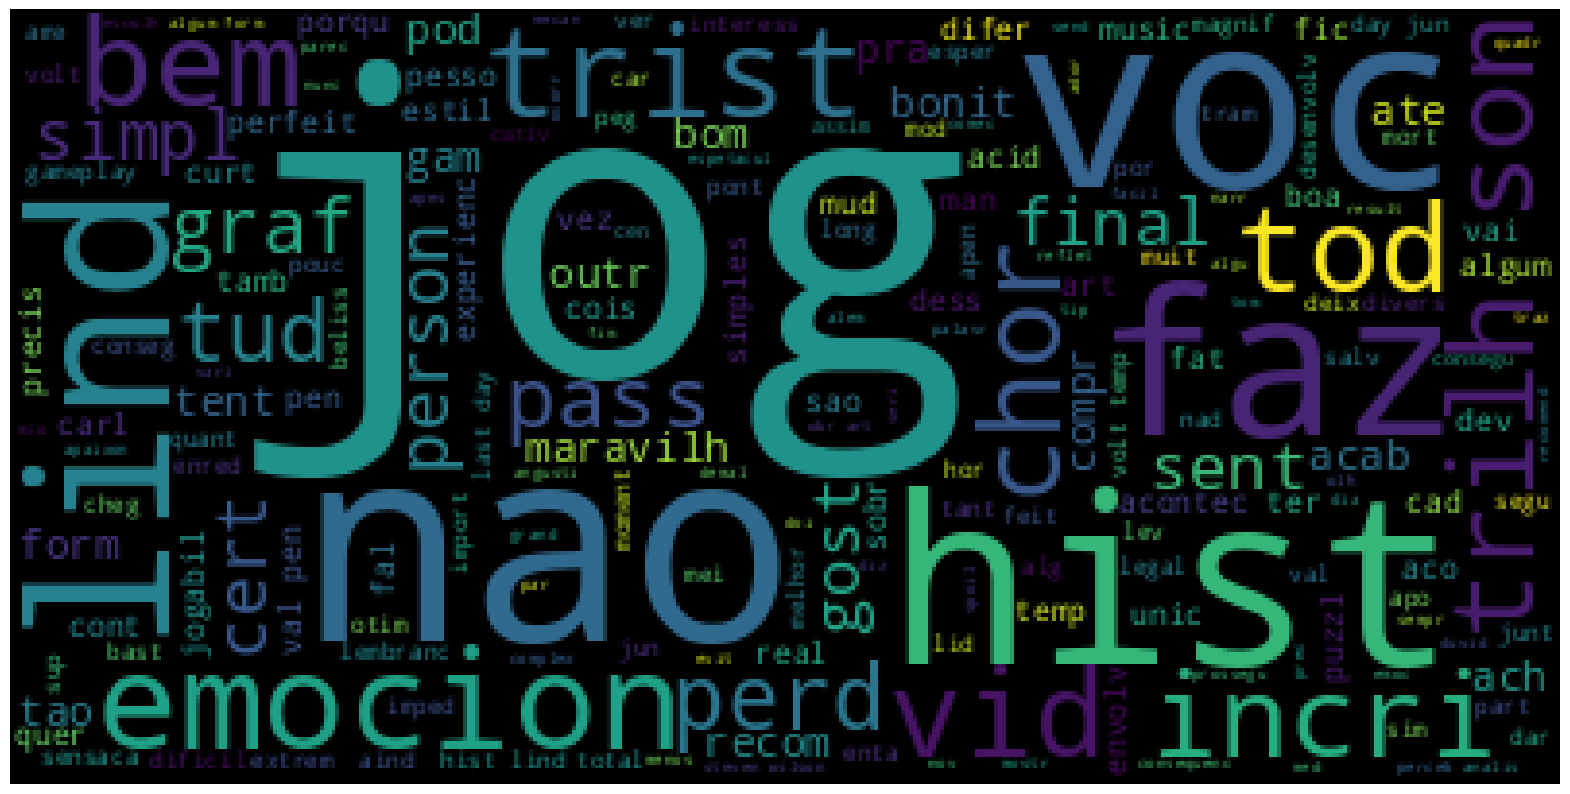

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(juntandotudo))

